# Herman Franclin Tesso Tassang

# 1. Get the Data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# dependencies

import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### get and load the data

There are tree columns named:
*  shower_depth
*  shower_width
* type

The column named **type** is the one storing the targets.

In [5]:
file_path='/content/gdrive/MyDrive/Shortcut to courses materials/ML by hand/calo_shower_data.csv'

df=pd.read_csv(file_path)
df

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron
...,...,...,...
99995,94.844879,22.915035,electron
99996,91.389386,21.634711,electron
99997,66.610819,23.150888,electron
99998,94.607568,25.352104,electron


### How many samples are there?


In [6]:
print('there are exactly {} sample'.format(df.shape[0]))

there are exactly 100000 sample


# 2. Feature Scaling

## 2.1 explain

Gradient descent is highly influenced by the scale and distribution of the data. If the data are not zero-centered, it can introduce bias in a specific direction, resulting in two possible scenarios:
- The learning process becomes slower because it requires more steps to converge to the minimum of the cost function due to the difference in range.
- There is a risk of divergence. Since the learning rate remains constant when updating all parameters, a large leap in one direction can potentially cause instability.


### 2.2 standardization

In [7]:
MEAN_X1  = np.mean(df['shower_depth'])
SIGMA_X1 = np.std(df['shower_depth'])
MEAN_X2  = np.mean(df['shower_width'])
SIGMA_X2 = np.std(df['shower_width'])

df['shower_depth_scaled'] = (df['shower_depth']-MEAN_X1)/SIGMA_X1
df['shower_width_scaled'] = (df['shower_width']-MEAN_X2)/SIGMA_X2

df

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled
0,102.726547,41.060509,hadron,0.091799,1.763380
1,55.953644,19.107106,electron,-1.399667,-0.656104
2,76.237938,21.859595,electron,-0.752854,-0.352752
3,145.829765,18.478401,hadron,1.466248,-0.725393
4,151.974596,33.539821,hadron,1.662191,0.934525
...,...,...,...,...,...
99995,94.844879,22.915035,electron,-0.159527,-0.236432
99996,91.389386,21.634711,electron,-0.269714,-0.377536
99997,66.610819,23.150888,electron,-1.059838,-0.210439
99998,94.607568,25.352104,electron,-0.167094,0.032157


In [8]:
## checking the statistics
df.describe()

,shower_depth,shower_width,shower_depth_scaled,shower_width_scaled
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,99.847703,25.060322,3.665690e-16,6.222223e-16
std,31.360512,9.073636,1.000005e+00,1.000005e+00
min,0.013479,0.139829,-3.183453e+00,-2.746486e+00
25%,80.005289,18.726105,-6.327229e-01,-6.980937e-01
50%,97.648121,22.890813,-7.013892e-02,-2.391015e-01
75%,121.048161,30.209608,6.760274e-01,5.675026e-01
max,222.651768,73.082693,3.915902e+00,5.292543e+00


#3. Data Prep

### 3.1 Adding x0 column

In [9]:
df['x_0']=np.full(df.shape[0],1)

df

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x_0
0,102.726547,41.060509,hadron,0.091799,1.763380,1
1,55.953644,19.107106,electron,-1.399667,-0.656104,1
2,76.237938,21.859595,electron,-0.752854,-0.352752,1
3,145.829765,18.478401,hadron,1.466248,-0.725393,1
4,151.974596,33.539821,hadron,1.662191,0.934525,1
...,...,...,...,...,...,...
99995,94.844879,22.915035,electron,-0.159527,-0.236432,1
99996,91.389386,21.634711,electron,-0.269714,-0.377536,1
99997,66.610819,23.150888,electron,-1.059838,-0.210439,1
99998,94.607568,25.352104,electron,-0.167094,0.032157,1


### 3.2 Matrix

In [10]:
## x_1 and x_2 represent the scaled shower_depth col , and the scaled shower_width col respectively

X=df[['x_0','shower_depth_scaled','shower_width_scaled']]
X=X.rename(columns={'shower_depth_scaled':'x_1','shower_width_scaled':'x_2'})
X

,x_0,x_1,x_2
0,1,0.091799,1.763380
1,1,-1.399667,-0.656104
2,1,-0.752854,-0.352752
3,1,1.466248,-0.725393
4,1,1.662191,0.934525
...,...,...,...
99995,1,-0.159527,-0.236432
99996,1,-0.269714,-0.377536
99997,1,-1.059838,-0.210439
99998,1,-0.167094,0.032157


### 3.3 Labels to binary

In [11]:
## Method: create a mask index (bool) and convert it to integer.
mask=(df['type']=='electron')
# map to integer 0 or 1 (bool )
binary=mask.astype(int)
# add to the data frame
df['y']=binary

df

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x_0,y
0,102.726547,41.060509,hadron,0.091799,1.763380,1,0
1,55.953644,19.107106,electron,-1.399667,-0.656104,1,1
2,76.237938,21.859595,electron,-0.752854,-0.352752,1,1
3,145.829765,18.478401,hadron,1.466248,-0.725393,1,0
4,151.974596,33.539821,hadron,1.662191,0.934525,1,0
...,...,...,...,...,...,...,...
99995,94.844879,22.915035,electron,-0.159527,-0.236432,1,1
99996,91.389386,21.634711,electron,-0.269714,-0.377536,1,1
99997,66.610819,23.150888,electron,-1.059838,-0.210439,1,1
99998,94.607568,25.352104,electron,-0.167094,0.032157,1,1


### 3.4 vector Y

In [12]:
# extra y to the data frame
y=df['y']

y

0        0
1        1
2        1
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: y, Length: 100000, dtype: int64

# 4. DataFrames to Numpy

In [13]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

y_train=y_train.reshape(len(y_train),-1)
y_test=y_test.reshape(len(y_test),-1)

### 4.1 Shapes

In [14]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('')
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (80000, 3)
y_train shape: (80000, 1)

X_test shape: (20000, 3)
y_test shape: (20000, 1)


Comment:

The training set is now consists of 80000 samples whereas the testing set is consist of 20000 samples.


### 4.2 Test size

Looking at the shapes above, the 'test_size' represente the proportion of the dataset to be use as test set. (in our case 20 percent of the dataset will be use as the test set).

# 5. Useful Functions

### 5.1 Linear Sum

Out ouput should be  $m\times 1$ matrix.

In [15]:
def lin_sum(X, thetas):
  z=X.dot(thetas.T)
  return z


### Logistic Function

In [16]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
  # Your code here


### 5.3 Hypothesis Function

In [17]:
def h_class(X, thetas):
  z= lin_sum(X,thetas)
  h=sigmoid(z)
  return h

#5.4 Partial Derivatives of Cross-Entropy Cost Function

In [18]:
def derivatives_cross_entropy(y_preds, y_obs, x_feature):

  derivative=(1/len(y_obs))*((y_preds-y_obs).T).dot(x_feature)
  return derivative



# 5.5 Cross-Entropy Cost Function

In [19]:
def cross_entropy_cost(y_vals, y_preds):
  cost = -1/len(y_vals)*np.sum(y_vals*np.log(y_preds)+(1-y_vals)*np.log(1-y_preds))
  return cost

#6. Classifier

In [20]:
# Hyperparameters
alpha = 0.1# ...
N =500  # ... epochs

# Number of features + 1 (number of columns in X)
n = 3 # ...

# Initialization of theta *row vector*
#thetas = np.random.randn(1,n)# ...
thetas=np.random.uniform(0,1,size=(1,n))
# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for i in range(1, N+1):

  # Get predictions (hypothesis function)
  y_preds = h_class(X_train, thetas) # ...
  y_preds_test = h_class(X_test, thetas)# ...

  # Calculate and store costs with train and test datasets

  J_train = cross_entropy_cost(y_train, y_preds); costs_train.append(J_train)
  J_test  = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)
  # Get partial derivatives d/dTheta_j

  dJ_thetas=derivatives_cross_entropy(y_preds, y_train, X_train)
  # ...

  # Calculate new theta parameters:
  thetas_new = thetas- alpha*dJ_thetas # ...

  # Update the parameters for the next iteration
  thetas=thetas_new

  # --------------------
  #  P R I N T O U T S
  # --------------------
  # Every 10 iterations and n > 100 every 100 iterations
  if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
    print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.4f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0,0], thetas[0,1], thetas[0,2],   J_train,  dJ_thetas[0,0],   dJ_thetas[0,1],   dJ_thetas[0,2]))

print(f'\nEnd of gradient descent after {i} iterations')

print('Optimized thetas:')
print(f'Theta 0 = {thetas[0,0]:.4f}, Theta 1 = {thetas[0,1]:.4f}, Theta 2 = {thetas[0,2]:.4f}')

Starting gradient descent

[10]	t0 = 0.4135  t1 = 0.1755  t2 = 0.2383  Cost = 0.8796  dJ0 = 0.0993  dJ1 = 0.3945  dJ2 = 0.3569
[20]	t0 = 0.3231  t1 = -0.1586  t2 = -0.0628  Cost = 0.6571  dJ0 = 0.0811  dJ1 = 0.2879  dJ2 = 0.2575
[30]	t0 = 0.2536  t1 = -0.4022  t2 = -0.2773  Cost = 0.5406  dJ0 = 0.0608  dJ1 = 0.2125  dJ2 = 0.1841
[40]	t0 = 0.2012  t1 = -0.5870  t2 = -0.4344  Cost = 0.4761  dJ0 = 0.0466  dJ1 = 0.1653  dJ2 = 0.1382
[50]	t0 = 0.1601  t1 = -0.7345  t2 = -0.5555  Cost = 0.4366  dJ0 = 0.0372  dJ1 = 0.1347  dJ2 = 0.1090
[60]	t0 = 0.1266  t1 = -0.8569  t2 = -0.6530  Cost = 0.4101  dJ0 = 0.0308  dJ1 = 0.1135  dJ2 = 0.0892
[70]	t0 = 0.0984  t1 = -0.9615  t2 = -0.7341  Cost = 0.3914  dJ0 = 0.0262  dJ1 = 0.0980  dJ2 = 0.0751
[80]	t0 = 0.0741  t1 = -1.0528  t2 = -0.8031  Cost = 0.3774  dJ0 = 0.0228  dJ1 = 0.0862  dJ2 = 0.0645
[90]	t0 = 0.0528  t1 = -1.1337  t2 = -0.8630  Cost = 0.3666  dJ0 = 0.0202  dJ1 = 0.0769  dJ2 = 0.0564
[200]	t0 = -0.0894  t1 = -1.6818  t2 = -1.2376  Cost = 0.

# 7. Plot cost versus epochs

In [21]:
def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):

  fig, ax = plt.subplots(figsize=(8, 6))

  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=18, pad=20)
  plt.show()

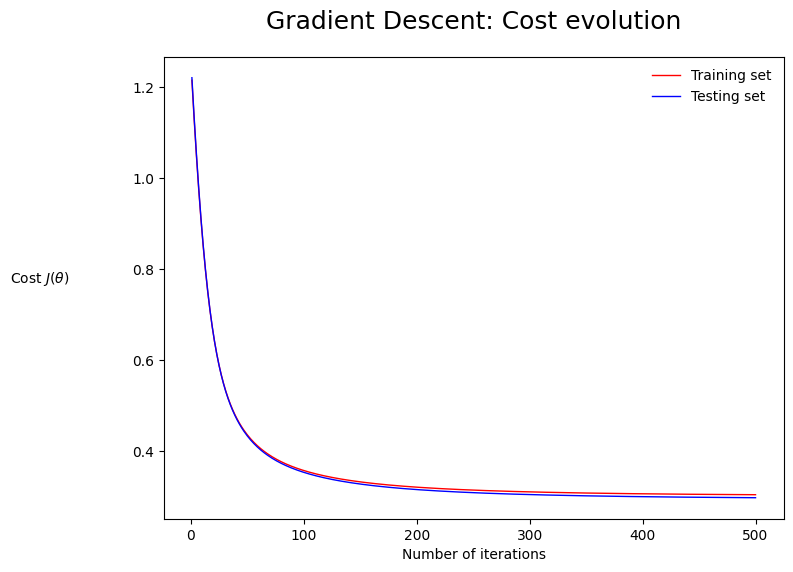

In [22]:
plot_cost_vs_iter(costs_train, costs_test)

### 7.1: Describe the plot; what is the fundamental difference between the two series train and test?
* Both the total loss (cost) of the training and test set consistently decrease over iterations (number of epochs) until convergence at around **0.3**, and they are relatively close to each other.

* The fundamental difference between the train and test set is that the train set is used to update the model parameters during the training process, whereas the test set is new unseen data (by the model) used to assess how good the model is for prediction after training.



### 7.2: What would it mean if there would be a bigger gap between the test and training values of the cost?

If there were a bigger gap between the test and training values of the cost (i.e., if the training cost had been much lower than the test cost ), it would typically have indicated that the model was overfitting to the training data.


# 8. Performance

In [23]:
def make_predictions(thetas, X, y, boundary=0.5):

  bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ]

  return bin_preds

In [24]:
# call the pedict function
preds = make_predictions(thetas, X_test, y_test, 0.5)
# turn to 1D array
preds=np.array(preds)
# flatten the observe test values
# Turn y_test into 1D array:
obs_test = y_test[:,0]


### 8.1 Accuracy

In [25]:
def get_accuracy(obs_values, pred_values):
  # input are 1D arrays
  accuracy=np.sum(obs_values==pred_values)/len(obs_values) # mask index operation trick
  return accuracy


In [26]:
## call the accuracy function
print('the accuracy on the test set is:',get_accuracy(obs_test,preds) )

the accuracy on the test set is: 0.88175


### 8.2 Recall

In [27]:
def get_recall(obs_values, pred_values):
## use mask index to extra the positive observation and their corresponding precdiction values
  mask=(obs_values==1)
  recall=np.sum(obs_values[mask]==pred_values[mask])/len(obs_values[mask])
  return recall



In [28]:
print('the recall on the test set is:',get_recall(obs_test,preds) )

the recall on the test set is: 0.9116288411327576


# X. BONUS: Decision Boundaries

In [29]:
all_sig = df[df['type'] == 'electron'][['shower_depth', 'shower_width']]
all_bkg = df[df['type'] ==  'hadron' ][['shower_depth', 'shower_width']]

X1NAME = 'shower_depth'; X1LABEL = 'Shower depth [mm]'
X2NAME = 'shower_width'; X2LABEL = 'Shower width [mm]'
X1MIN  = 0 ; X1MAX = 200
X2MIN  = 0 ; X2MAX =  60

In [30]:
#@title scatter plot
# Raw scatter plot
def plot_scatter(sig, bkg, boundaries=False,
                 x1name=X1NAME, x1label=X1LABEL, x1min=X1MIN, x1max=X1MAX,
                 x2name=X2NAME, x2label=X2LABEL, x2min=X2MIN, x2max=X2MAX,
                 figsize=(6, 6), fontsize=20, alpha=0.2, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=figsize)

  # ------------------
  #      A X E S
  # ------------------
  ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))
  ax.set_xlabel(x1label); ax.set_ylabel(x2label)

  # ------------------
  #   S C A T T E R
  # ------------------
  scat_el = ax.scatter(sig[x1name], sig[x2name], marker='.', s=1, c='dodgerblue', alpha=alpha)
  scat_had= ax.scatter(bkg[x1name], bkg[x2name], marker='.', s=1, c='darkorange', alpha=alpha)

  # ----------------------
  #  B O U N D A R I E S
  # ----------------------
  # if boundaries:

   #...
    # ... stuff to do here

  # ------------------
  #   L E G E N D S
  # ------------------
  # Legend scatter
  h = [scat_el, scat_had]
  legScatter = ax.legend(handles=h, labels=['electron', 'hadron'],
                         title="Shower type\n", title_fontsize=fontsize, markerscale=20,
                         bbox_to_anchor=(1.06, 0.8), loc="center left" , frameon=False)

  # Legend boundary
  if boundaries:
    ax.add_artist(legScatter)
    legLines = ax.legend(title="Decision boundaries",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",
                       title_fontsize=fontsize, frameon=False)

  ax.set_title(title, fontsize=fontsize, pad=20)
  print('\n\n') ; plt.show()

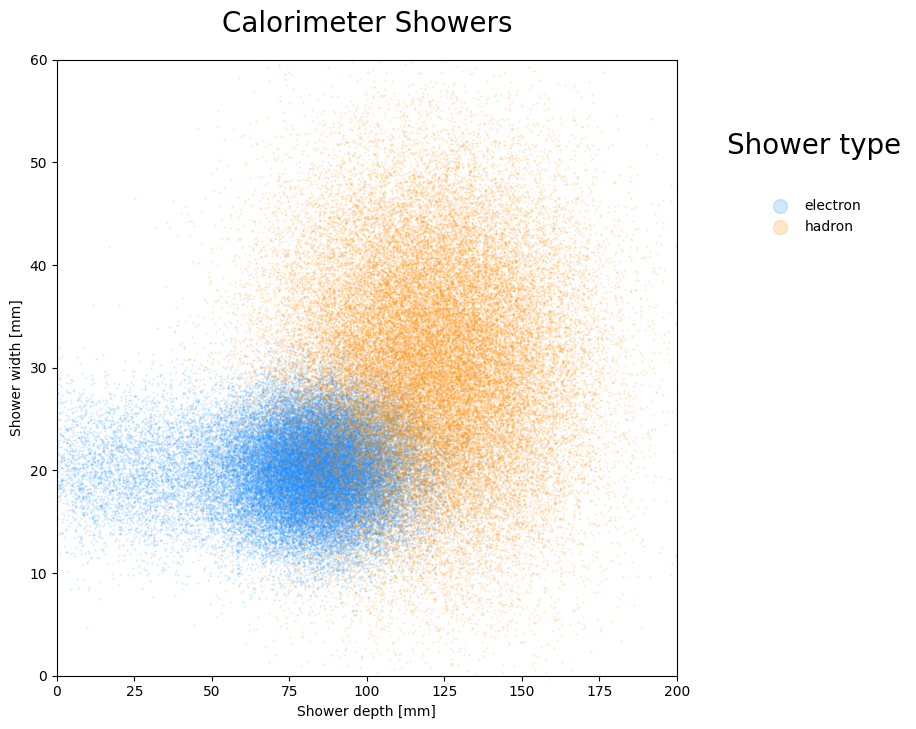

In [31]:
plot_scatter(all_sig, all_bkg,figsize=(8, 8),
             fontsize=20, alpha=0.2, title="Calorimeter Showers")

### X.1 Useful functions

recall the logic function, $\ \hat{y}=\frac{1}{1+e^{-z}}$.

The reverse of the sigmoid function is given by:
$$f(\hat{y})=-\log\big(\frac{1-\hat{y}}{\hat{y}}\big)$$



In [32]:
def rev_sigmoid(y_hat):             # reverse Sigmoid function
  return -np.log((1-y_hat)/y_hat)


def scale_inputs(x,mean=MEAN_X1,std=SIGMA_X1):      # scale function
  return (x-mean)/std

def unscale_inputs(x,mean=MEAN_X2,std=SIGMA_X2):    # unscale function
  return std*x + mean


### X.2 Equation of the boundary line

recall: the linear sum of the features $X$ by the $\theta$ parameter is
$$ z(x_1,x_2)=\theta_0+\theta_1 x_1 + \theta_2 x_2 \quad  (**)\ ,\ where\ \theta_0\ is\ the\ bias$$

For a given threshold $\hat{y}$, the boundary decision space is the set of point $(x_1,x_2)$ satisfying the equation :
$$z(x_1,x_2)=f(\hat{y}) ⟺ \theta_1 x_1 + \theta_2 x_2 + \theta_0=f(\hat{y}),\ \ where\ f(\hat{y})\ is\ the\ reverse\ sigmoid\ function $$

i.e
$$x_2=-\frac{\theta_1}{\theta_2}x_1+\frac{f(\hat{y})}{\theta_2}-\frac{\theta_0}{\theta_2},\quad (equation\ of\ a\ line\  in\ our\ particular\ case\ )$$



### X.3 Coordinate points

In [33]:
def get_boundary_line_x2(thresholds, thetas, x1_min=X1MIN, x1_max=X1MAX):      # thresholds and thetas are vectors
  f=rev_sigmoid(thresholds)                                         # compute the rev_sigmoid of the thresholds list
  scl_x1_min,scl_x1_max=scale_inputs(x1_min),scale_inputs(x1_max)   # scale x1_min and x1_max
  scl_x2_left=(-thetas[1]*scl_x1_min+f-thetas[0])/thetas[2]         # get the correspondind scaled x2_left and x2_max
  scl_x2_right=(-thetas[1]*scl_x1_max+f-thetas[0])/thetas[2]        # ........
  x2_left=unscale_inputs(scl_x2_left)                               # unscale x2_left and x2_max
  x2_right=unscale_inputs(scl_x2_right)                             #..............
  # store the results a dictionary
  return  {'threshold':thresholds ,'x2_left':x2_left , 'x2_right':x2_right}


In [34]:
#@title lines properties
thresholds=np.array([0.10,0.25,0.50,0.75,0.90])  # list of thresholds (1D array)
param=thetas[0]                                  # list of parameters thetas (1D arry)

lines=get_boundary_line_x2(thresholds=thresholds, thetas=param, x1_min=X1MIN, x1_max=X1MAX) # get the lines properties
print('lines properties:')
print('')
lines

lines properties:



{'threshold': array([0.1 , 0.25, 0.5 , 0.75, 0.9 ]),
 'x2_left': array([77.44509547, 71.10353467, 64.76197387, 58.42041307, 52.07885227]),
 'x2_right': array([ -4.76887206, -11.11043286, -17.45199366, -23.79355446,
        -30.13511526])}

In [35]:
#@title X.4 Plotting the boundaries (advanced)
# Raw scatter plot
def plot_scatter(sig, bkg, boundaries=False,
                 x1name=X1NAME, x1label=X1LABEL, x1min=X1MIN, x1max=X1MAX,
                 x2name=X2NAME, x2label=X2LABEL, x2min=X2MIN, x2max=X2MAX,
                 figsize=(6, 6), fontsize=20, alpha=0.2, title="Scatter plot"):

  fig, ax = plt.subplots(figsize=figsize)

  # ------------------
  #      A X E S
  # ------------------
  ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))
  ax.set_xlabel(x1label); ax.set_ylabel(x2label)

  # ------------------
  #   S C A T T E R
  # ------------------
  scat_el = ax.scatter(sig[x1name], sig[x2name], marker='.', s=1, c='dodgerblue', alpha=alpha)
  scat_had= ax.scatter(bkg[x1name], bkg[x2name], marker='.', s=1, c='darkorange', alpha=alpha)

  # ----------------------
  #  B O U N D A R I E S
  # ----------------------
  if boundaries:
    for i in range(len(boundaries['threshold'])):
      x2_left=boundaries['x2_left'][i]
      x2_right=boundaries['x2_right'][i]
      label='y={}'.format(boundaries['threshold'][i])  # label each line
      ax.plot([x1min, x1max], [x2_left, x2_right], ls='--', lw=2,label=label)

   #...
    # ... stuff to do here

  # ------------------
  #   L E G E N D S
  # ------------------
  # Legend scatter
  h = [scat_el, scat_had]
  legScatter = ax.legend(handles=h, labels=['electron', 'hadron'],
                         title="Shower type\n", title_fontsize=fontsize, markerscale=20,
                         bbox_to_anchor=(1.06, 0.8), loc="center left" , frameon=False)

  # Legend boundary
  if boundaries:
    ax.add_artist(legScatter)
    legLines = ax.legend(title="Decision boundaries",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",
                       title_fontsize=fontsize, frameon=False)

  ax.set_title(title, fontsize=fontsize, pad=20)
  print('\n\n') ; plt.show()

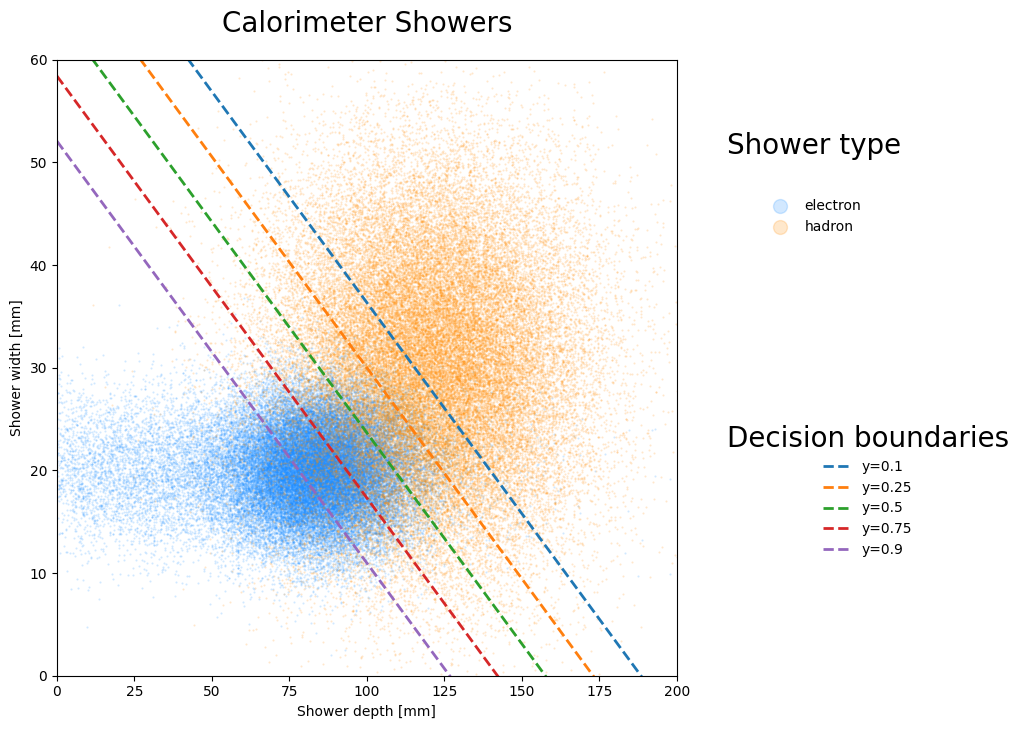

In [36]:
#@title plot
plot_scatter(all_sig, all_bkg,boundaries=lines,
             figsize=(8, 8), fontsize=20, alpha=0.2, title="Calorimeter Showers")